In [1]:
##### -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import ruptures as rpt
# import pwlf
from scipy import interpolate
from __future__ import division
from more_itertools import chunked
%matplotlib widget

In [2]:
# read the correlated force data and image data from step2:(2_Correlation_image_force).e.g.:cycle#1-correlated_data.xlsx

cor_file = 'example_dataset/image data/20190529-143510 gp2.5 Alexa 647 + DNAp #012-001-cycle#1-correlated_data.xlsx'
cor_file2 = 'example_dataset/image data/20190529-143510 gp2.5 Alexa 647 + DNAp #012-001-cycle#1-Intensity along DNAp-filtered.txt' 
cor_file3 = 'example_dataset/image data/StepFit_Result/image data-cycle#1-Intensity along DNAp-filtered_fits.txt'

In [3]:
# read the correlated force data
raw_basepair = pd.read_excel(cor_file,sheet_name = 'raw_basepair')
cp_basepair = pd.read_excel(cor_file,sheet_name = 'cp_basepair')
# read the correlated image data
raw_intensity = np.loadtxt(cor_file2)
filtered_intensity = np.genfromtxt(cor_file3, delimiter=',', skip_header=1)
step_intensity = pd.read_excel(cor_file,sheet_name = 'step_intensity')
binarized_intensity = pd.read_excel(cor_file,sheet_name = 'binarized_intensity')

time_intens = binarized_intensity['time/s']
time_intens = np.array(time_intens)
intensity_raw = raw_intensity.T[1]
intensity_filtered = filtered_intensity.T[1]
intensity = binarized_intensity['binarized_intensity']
intensity = np.array(intensity)
intensity_step = step_intensity['step_intensity']
intensity_step = np.array(intensity_step)

bp_time = raw_basepair['time/s']
bp_time = np.array(bp_time)
bp = raw_basepair['raw_basepair']
bp = np.array(bp)
cp_basepair_interp = cp_basepair['cp_basepair']
cp_basepair_interp = np.array(cp_basepair_interp)

# print(raw_basepair.head())
# print(cp_basepair.head())
# print(binarized_intensity.head())

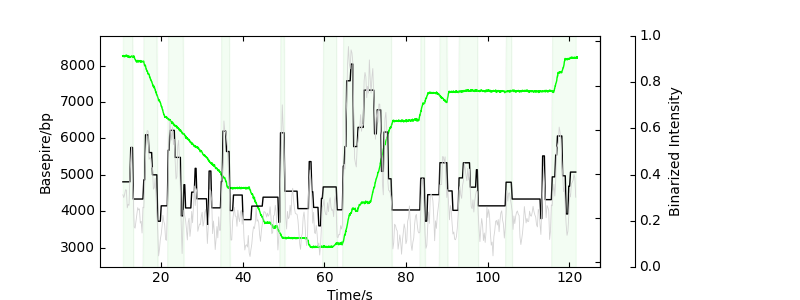

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
# plot the correlated force data and image data from step 2 to double check
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(8,3))
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

offset = 25
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Time/s",fontdict=font)
host.set_ylabel("Basepire/bp",fontdict=font)
# host.set_ylabel("DNAp Activity Burst")
par1.set_ylabel("Step-like Intensity",fontdict=font)
par2.set_ylabel("Binarized Intensity",fontdict=font)

p0, = host.plot(bp_time,bp, "lime",label = 'Basepairs',linewidth=1)


# p0, = host.plot(bp_time[:-1],np.diff(cp_basepair_interp)/np.diff(bp_time),"red", label = "DNAp Activity Burst",linewidth = 1)
p1, = par1.plot(time_intens,intensity_step,color='black',linewidth=1, label='Step-like intensity')
p2, = par2.plot(time_intens,intensity,color='lightgray',linewidth=0.1, label='Binarized Intensity')
par2.fill_between(time_intens,intensity, 0, color='lightgreen',alpha=0.1)
p3, = par3.plot(time_intens,intensity_raw[:-1],color='lightgray',linewidth=0.6, linestyle='solid', markersize=0.5,label='Raw Intensity')

host.autoscale()
host.margins(0.1)

# par1.axhline(np.average(bagrnd_signal_filter)+threshold_sigma*np.std(bagrnd_signal_filter), color='grey', linestyle='--',label=str(threshold_sigma) + ' Sigma threshold')
# par1.axhline(np.average(bagrnd_signal_filter)-threshold_sigma*np.std(bagrnd_signal_filter), color='grey', linestyle='--')

par1.set_ylim(10, 77)
par2.set_ylim(0, 1)

par2.axis["right"].label.set_color(p1.get_color())
par2.axis('off')
par1.yaxis.set_ticklabels([])
par1.yaxis.set_ticks([])

# plt.ylim(6500,7800)
# plt.xlim(17,29)
plt.show()
plt.tight_layout()

plt.savefig(cor_file.replace('-correlated_data.xlsx', '-all_correlated_data-replot.eps'), format='eps', dpi=300,bbox_inches='tight')

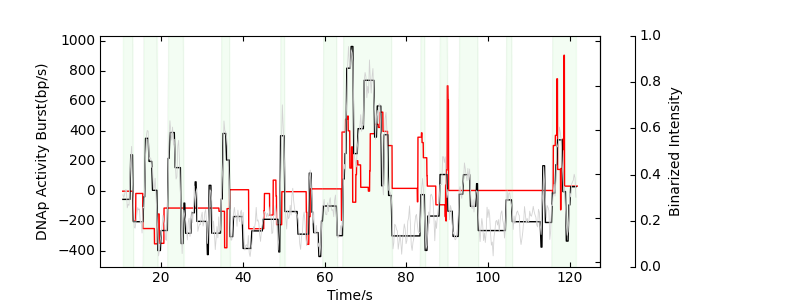

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [5]:
# plot the burst activity and fluorescence image data 
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(8,3))
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

offset = 25
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Time/s",fontdict=font)
host.set_ylabel("DNAp Activity Burst(bp/s)",fontdict=font)
# par1.set_ylabel("Step-like Intensity",fontdict=font)
par2.set_ylabel("Binarized Intensity",fontdict=font)

# p0, = host.plot(bp_time,bp, "lime",label = 'Basepairs',linewidth=1)

p0, = host.plot(bp_time[:-1],np.diff(cp_basepair_interp)/np.diff(bp_time),"red", label = "DNAp Activity Burst",linewidth = 1)
p1, = par1.plot(time_intens,intensity_step,color='black',linewidth=1, label='Step-like intensity')
p2, = par2.plot(time_intens,intensity,color='lightgray',linewidth=0.1, label='Binarized Intensity')
par2.fill_between(time_intens,intensity, 0, color='lightgreen',alpha=0.1)
p3, = par3.plot(time_intens,intensity_raw[:-1],color='lightgray',linewidth=0.6, linestyle='solid', markersize=0.5,label='Raw Intensity')

host.autoscale()
host.margins(0.1)

# par1.set_ylim(7, 87)
par2.set_ylim(0, 1)

par2.axis["right"].label.set_color(p1.get_color())
par2.axis('off')
par1.yaxis.set_ticklabels([])
par1.yaxis.set_ticks([])

# plt.xlim(32,40)
# plt.xlim(32,40)
plt.show()
plt.tight_layout()

plt.savefig(cor_file.replace('-correlated_data.xlsx', '-Activity Burst Correlates with Fluorescence Signal-zoomedin.eps'), format='eps', dpi=300,bbox_inches='tight')


In [6]:
# the following code blocks are intended to find out the bound protein events, 
# by splitting binarized intensity-time plots into sub-segments based on zero value
# step 1: finding all the zero value points
index = np.where(intensity==0)[0]
index = np.insert(index,0,0)
index = np.append(index,len(intensity))
# print(index)
# print(len(index))

# step 2: creating sub-segments from one zero-value to next zero-value
time_list = []
for i, value in enumerate(index):
    try:
        time_lis = time_intens[index[i]:index[i+1]]
    except IndexError:
        pass
    time_list.append(time_lis)   
# print(time_list)

# step 3: filtering the sub-segments without or only 1 one-value, 
# which indicates no protein occurs or protein occurs for only one pixel time
# this returns the bound events!!
filter_dots = 2 # default value is 3
time_lst = [x for x in time_list if x.size > filter_dots]
# print(len(time_lst))

# step 4: calculating the starting time and ending time of the segments
start_time = []
end_time = []
for arr in time_lst:
    start_time.append(arr[1])
    end_time.append(arr[-1])

# start_time = start_time[:-1]
# end_time = end_time[:-1]

print(start_time)
print(end_time)

[10.87340816326531, 15.77710204081633, 21.74681632653061, 34.75226530612245, 49.25014285714285, 59.69714285714286, 64.60083673469387, 83.576, 88.26648979591836, 92.95697959183673, 104.47, 115.7698163265306, 115.7698163265306]
[13.00544897959184, 18.97516326530612, 25.37128571428572, 36.67110204081632, 50.10295918367347, 62.89520408163265, 76.3270612244898, 84.42881632653061, 89.97212244897959, 97.43426530612244, 105.7492244897959, 121.5263265306122, 121.5263265306122]


In [7]:
# step 5: distinguish the exo and pol events based on force_transition_time
force_transi_time = input('please type in the force transision time in s:' ) 
force_transi_time = float(force_transi_time)
# to find out whether protein presents during force transition
func_1 = interpolate.interp1d(time_intens,intensity,kind='slinear',fill_value="extrapolate")
force_transi_intensity = int(func_1(force_transi_time))
# print(force_transi_intensity)

start_time_exo = []
end_time_exo = []
start_time_pol = []
end_time_pol = []
if force_transi_intensity == 0: 
    for i,value in enumerate(end_time):
        if value < force_transi_time:
            start_time_exo.append(start_time[i])
            end_time_exo.append(value)
    for i,value in enumerate(start_time):
        if value > force_transi_time:
            start_time_pol.append(value)             
            end_time_pol.append(end_time[i]) 
    start_time_pol = start_time_pol[:]
    end_time_pol = end_time_pol[:]
        
if force_transi_intensity == 1:
    for i,value in enumerate(end_time):
        if value < force_transi_time:
            start_time_exo.append(start_time[i])
            end_time_exo.append(value)
    start_time_exo.append(start_time[len(start_time_exo)])
    end_time_exo.append(force_transi_time)
    for i,value in enumerate(start_time):
        if value > force_transi_time:
            start_time_pol.append(value)
            end_time_pol.append(end_time[i]) 
    try:
        end_time_pol.insert(0,end_time[len(end_time_exo)-1])  
    except IndexError:
        pass
    if len(end_time_pol) == 0:
        end_time_pol.insert(0,end_time[-1])
    start_time_pol.insert(0,force_transi_time)
    
print(start_time_exo)
print(end_time_exo)
print(start_time_pol)
print(end_time_pol)

[10.87340816326531, 15.77710204081633, 21.74681632653061, 34.75226530612245, 49.25014285714285, 59.69714285714286]
[13.00544897959184, 18.97516326530612, 25.37128571428572, 36.67110204081632, 50.10295918367347, 62.89520408163265]
[64.60083673469387, 83.576, 88.26648979591836, 92.95697959183673, 104.47, 115.7698163265306, 115.7698163265306]
[76.3270612244898, 84.42881632653061, 89.97212244897959, 97.43426530612244, 105.7492244897959, 121.5263265306122, 121.5263265306122]


In [8]:
# step 6: distinguish the bound events and unbound events in exo and pol, respectively
# to calculate the dark events in exo region
dark_exo_start = []
dark_exo_end = []
if intensity[0] == 1 and force_transi_intensity == 0: #start with bound protein but lost during force transition 
    for i,value in enumerate(end_time_exo):
        try:
            dark_exo_start.append(value)
            dark_exo_end.append(start_time_exo[i+1])        
        except IndexError:
            pass
    dark_exo_end.append(force_transi_time)
    
if intensity[0] == 1 and force_transi_intensity == 1: #start with bound protein and have protein bound during force transition 
    for i,value in enumerate(end_time_exo):
        try:
            dark_exo_start.append(value)
            dark_exo_end.append(start_time_exo[i+1])        
        except IndexError:
            pass
    dark_exo_start = dark_exo_start[:-1]
    dark_exo_end = dark_exo_end[:]
    
if intensity[0] == 0 and force_transi_intensity == 0: #start without protein and have no protein bound during force transition 
    for i,value in enumerate(start_time_exo):
        try:        
            dark_exo_end.append(value)
            dark_exo_start.append(end_time_exo[i])
        except IndexError:
            pass
    dark_exo_start.insert(0,start_time_exo[0])
    dark_exo_end.append(force_transi_time)
    
if intensity[0] == 0 and force_transi_intensity == 1: #start without protein and have protein bound during force transition 
    for i,value in enumerate(start_time_exo):
        try:        
            dark_exo_end.append(value)
            dark_exo_start.append(end_time_exo[i])
        except IndexError:
            pass
    dark_exo_start.insert(0,start_time_exo[0])
    dark_exo_start = dark_exo_start[:-1]
    
print (dark_exo_start)
print (dark_exo_end)

[13.00544897959184, 18.97516326530612, 25.37128571428572, 36.67110204081632, 50.10295918367347, 62.89520408163265]
[15.77710204081633, 21.74681632653061, 34.75226530612245, 49.25014285714285, 59.69714285714286, 63.0]


In [9]:
# step 6: distinguish the bound events and unbound events in exo and pol, respectively
# to calculate the dark events in pol regin   
dark_pol_start = []
dark_pol_end = []
if intensity[-1] == 1 and force_transi_intensity == 0: #end with bound protein but have no protein bound during force transition 
    for i,value in enumerate(start_time_pol):
        try:
            dark_pol_end.append(value)
            dark_pol_start.append(end_time_pol[i])        
        except IndexError:
            pass
    dark_pol_start.insert(0,force_transi_time)
    dark_pol_start = dark_pol_start[:-1]
    
if intensity[-1] == 1 and force_transi_intensity == 1: #end with bound protein and have protein bound during force transition 
    for i,value in enumerate(end_time_pol):
        try:
            dark_pol_start.append(value)
            dark_pol_end.append(start_time_pol[i+1])        
        except IndexError:
            pass
    dark_pol_start = dark_pol_start[:-2]
    dark_pol_end = dark_pol_end[:-1]
    
if intensity[-1] == 0 and force_transi_intensity == 0: #end without protein and have no protein bound during force transition 
    for i,value in enumerate(start_time_pol):
        try:        
            dark_pol_end.append(value)
            dark_pol_start.append(end_time_pol[i])
        except IndexError:
            pass
    dark_pol_start.insert(0,force_transi_time)
    dark_pol_end.append(end_time_pol[-1])
    
if intensity[-1] == 0 and force_transi_intensity == 1: #end without protein but have protein bound during force transition 
    for i,value in enumerate(end_time_pol):
        try:
            dark_pol_start.append(value)
            dark_pol_end.append(start_time_pol[i+1])        
        except IndexError:
            pass
    dark_pol_end.append(end_time_pol[-1])

print (dark_pol_start)
print (dark_pol_end)

[63.0, 76.3270612244898, 84.42881632653061, 89.97212244897959, 97.43426530612244, 105.7492244897959, 121.5263265306122]
[64.60083673469387, 83.576, 88.26648979591836, 92.95697959183673, 104.47, 115.7698163265306, 115.7698163265306]


In [10]:
# pause

In [11]:
# the following code block is intended to calculate the rates(slopes), iterating all the sub-segments

# this re-defination is because I am using the codes I wrote before
time = np.round(bp_time,3)
basepairs = np.round(bp,3)
# basepairs = np.round(cp_basepair_interp,3)

rate_bound_exo = []
rate_bound_pol = []
rate_unbound_exo = []
rate_unbound_pol = []

for i,value in enumerate(start_time_exo): 
    time_from_i = value
    time_to_i = end_time_exo[i]
    indtemp = np.where((time <= time_to_i) & (time >= time_from_i))
    time_ROI = time[indtemp]
    basepairs_ROI = basepairs[indtemp]
    try:
        duration_time = time_ROI[-1] - time_ROI[0]
        processivity = basepairs_ROI[-1] - basepairs_ROI[0]
    except IndexError:
        pass
    rate_i = processivity/duration_time
    rate_bound_exo = np.append(rate_bound_exo, rate_i)

for i,value in enumerate(start_time_pol): 
    time_from_i = value
    time_to_i = end_time_pol[i]
    indtemp = np.where((time <= time_to_i) & (time >= time_from_i))
    time_ROI = time[indtemp]
    basepairs_ROI = basepairs[indtemp]
    try:
        duration_time = time_ROI[-1] - time_ROI[0]
        processivity = basepairs_ROI[-1] - basepairs_ROI[0]
    except IndexError:
        pass
    rate_i = processivity/duration_time
    rate_bound_pol = np.append(rate_bound_pol, rate_i)

for i,value in enumerate(dark_exo_start): 
    time_from_i = value
    time_to_i = dark_exo_end[i]
    indtemp = np.where((time <= time_to_i) & (time >= time_from_i))
    time_ROI = time[indtemp]
    basepairs_ROI = basepairs[indtemp]
    try:
        duration_time = time_ROI[-1] - time_ROI[0]
        processivity = basepairs_ROI[-1] - basepairs_ROI[0]
    except IndexError:
        pass
    rate_i = processivity/duration_time
    rate_unbound_exo = np.append(rate_unbound_exo, rate_i)

for i,value in enumerate(dark_pol_start): 
    time_from_i = value
    time_to_i = dark_pol_end[i]
    indtemp = np.where((time <= time_to_i) & (time >= time_from_i))
    time_ROI = time[indtemp]
    basepairs_ROI = basepairs[indtemp]
    try:
        duration_time = time_ROI[-1] - time_ROI[0]
        processivity = basepairs_ROI[-1] - basepairs_ROI[0]
    except IndexError:
        pass
    rate_i = processivity/duration_time
    rate_unbound_pol = np.append(rate_unbound_pol, rate_i)
    
print(rate_bound_exo)
print(rate_bound_pol)
print(rate_unbound_exo) 
print(rate_unbound_pol)

[ -12.06505223 -281.35012674 -107.23339871 -191.98133333 -112.57583548
   24.65378524]
[ 266.63391104  254.17839806 -108.84929078    8.04708268   16.04201681
  158.56558237  158.56558237]
[ -42.95887366 -247.01565914 -119.41499732 -100.21413191  -26.26111053
  -55.43478261]
[25.87524116 52.238135   59.85421109 94.36919399 -5.66419083 -0.51904571
 -0.51904571]


In [12]:
# Save all the analyzed data in an excel file
excel_filename = cor_file[:-10]+"-SegmentedTrack" + '.xlsx'

writer = pd.ExcelWriter(excel_filename)

data_0 = {'track_Nmr':np.arange(start=1, stop=len(start_time), step=1),
        'start_time/s':start_time[:-1],
        'end_time/s':end_time[:-1],
       'track_duration/s':(np.array(end_time)-np.array(start_time))[:-1]}
data_1 = {'track_Nmr':np.arange(start=1, stop=len(start_time_exo)+1, step=1),
        'start_time/s':start_time_exo,
        'end_time/s':end_time_exo,
       'track_duration/s':(np.array(end_time_exo)-np.array(start_time_exo)),
         'track_rate': rate_bound_exo}
data_2 = {'track_Nmr':np.arange(start=1, stop=len(start_time_pol)+1, step=1),
        'start_time/s':start_time_pol,
        'end_time/s':end_time_pol,
       'track_duration/s':(np.array(end_time_pol)-np.array(start_time_pol)),
          'track_rate': rate_bound_pol}
data_3 = {'track_Nmr':np.arange(start=1, stop=len(dark_exo_start)+1, step=1),
        'dark_exo_start/s':dark_exo_start,
        'dark_exo_end/s':dark_exo_end,
       'track_duration/s':(np.array(dark_exo_end)-np.array(dark_exo_start)),
          'track_rate': rate_unbound_exo}
data_4 = {'track_Nmr':np.arange(start=1, stop=len(dark_pol_start)+1, step=1),
        'dark_pol_start/s':dark_pol_start[:],
        'dark_pol_end/s':dark_pol_end[:],
        'dark_track_duration/s':(np.array(dark_pol_end)-np.array(dark_pol_start)),
          'track_rate': rate_unbound_pol}

df_0 = pd.DataFrame(data_0)
df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)
df_3 = pd.DataFrame(data_3)
df_4 = pd.DataFrame(data_4)

df_0.to_excel(writer,sheet_name ='all_bound_tracks')
df_1.to_excel(writer,sheet_name ='bound_exo_track')
df_2.to_excel(writer,sheet_name ='bound_pol_track')
df_3.to_excel(writer,sheet_name ='dark_exo_track')
df_4.to_excel(writer,sheet_name ='dark_pol_track')
writer.save()

/var/folders/7s/4zb5dg7n24q8rnf1200rm98r0000gn/T/ipykernel_93473/1749051220.py:42: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [13]:
# In order to map the DNAp events, all the visualized DNAp are extracted with additional dark time (1.5s in this case) before- and afterwards
# Therefore, this code block is intended to analyze the bound events in addtion to two- 1.5s segments beforewards and afterwards
# why 1.5? average on time + average off time roughly equals 1.5s
dark_segment_time = 2
start_time_exo_segment = np.array(start_time_exo) - dark_segment_time
end_time_exo_segment = np.array(end_time_exo) + dark_segment_time
start_time_pol_segment = np.array(start_time_pol) - dark_segment_time
end_time_pol_segment = np.array(end_time_pol) + dark_segment_time

# print(start_time_exo_segment)
# print(start_time_pol_segment)

In [14]:
# the following code block is intended to extract and visualize the DNAp bound events, iterating all the sub-segments

# this re-defination is because I am using the codes I wrote before
time = np.round(bp_time,3)
basepairs = np.round(bp,3)
basepairs_fitted = np.round(cp_basepair_interp,3)
# intensity = np.round(intensity,3)

segment_exo = []
segment_pol = []

#the data structure of segment_exo and segment_pol is: time_ROI,basepairs_ROI,basepairs_fitted_ROI,time_intens_ROI,intensity_ROI
# this code block is intended to distinguish the exo segments (exo events + 3s)
for i,value in enumerate(start_time_exo_segment): 
    time_from_i = value
    time_to_i = end_time_exo_segment[i]
    indtemp = np.where((time <= time_to_i) & (time >= time_from_i))
    indtemp2 = np.where((time_intens <= time_to_i) & (time_intens >= time_from_i))
    try:
        time_ROI = time[indtemp]
        basepairs_ROI = basepairs[indtemp]
        basepairs_fitted_ROI = basepairs_fitted[indtemp]
        time_intens_ROI = time_intens[indtemp2]
        intensity_ROI = intensity[indtemp2]
        intensity_step_ROI = intensity_step[indtemp2]
        intensity_raw_ROI = intensity_raw[indtemp2]
    except IndexError:
        pass
    force_data_exo = np.vstack((time_ROI,basepairs_ROI,basepairs_fitted_ROI)).T
    image_data_exo = np.vstack((time_intens_ROI,intensity_ROI,intensity_step_ROI,intensity_raw_ROI)).T
    segment_inexo = np.array([force_data_exo,image_data_exo],dtype=object)
    segment_exo.append(segment_inexo)
# this code block is intended to distinguish the pol segments (pol events + 3s)
for i,value in enumerate(start_time_pol_segment): 
    time_from_i = value
    time_to_i = end_time_pol_segment[i]
    indtemp = np.where((time <= time_to_i) & (time >= time_from_i))
    indtemp2 = np.where((time_intens <= time_to_i) & (time_intens >= time_from_i))
    try:
        time_ROI = time[indtemp]
        basepairs_ROI = basepairs[indtemp]
        basepairs_fitted_ROI = basepairs_fitted[indtemp]
        time_intens_ROI = time_intens[indtemp2]
        intensity_ROI = intensity[indtemp2]
        intensity_step_ROI = intensity_step[indtemp2]
        intensity_raw_ROI = intensity_raw[indtemp2]
    except IndexError:
        pass
    force_data_pol = np.vstack((time_ROI,basepairs_ROI,basepairs_fitted_ROI)).T
    image_data_pol = np.vstack((time_intens_ROI,intensity_ROI,intensity_step_ROI,intensity_raw_ROI)).T
    segment_inpol = np.array([force_data_pol,image_data_pol],dtype=object)
    segment_pol.append(segment_inpol)
# print (len(time_segment_exo[0]))
# print(len(intensity_segment_exo[0]))
print(len(segment_exo))
print(len(segment_pol))

# # the following block is intended to save the dada set
np.save(cor_file[:-20] + 'exo-segments' + '.npy', segment_exo, allow_pickle=True)
np.save(cor_file[:-20] + 'pol-segments' + '.npy', segment_pol, allow_pickle=True)

# # the following block is intended to load the dada set
# segment_exo = np.load(cor_file[:-20] + 'exo-segments' + '.npy', allow_pickle=True)
# segment_pol = np.load(cor_file[:-20] + 'pol-segments' + '.npy', allow_pickle=True)
# print(segment_exo)

6
7


In [15]:
# This step is to get a three y-axis figure, which shows basepairs, raw intensity and binarized intensity [https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html]
def segment_plots(segment, ax=None, plt_kwargs={}, sct_kwargs={}):
    if ax is None:
        ax = plt.gca()
        
    time_ROI = segment[0][:,0]
    basepairs_ROI = segment[0][:,1]
    basepairs_fitted_ROI = segment[0][:,2]
    
    time_intens_ROI = segment[1][:,0]
    intensity_ROI = segment[1][:,1]
    intensity_step_ROI = segment[1][:,2]
    intensity_raw_ROI = segment[1][:,3]
    
    twin1 = ax.twinx()
    twin2 = ax.twinx()
    twin3 = ax.twinx()
    
    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    # twin3.spines.right.set_position(("axes", 1.15))
    
    ax.plot(time_ROI,basepairs_fitted_ROI,"black", label = "step fitted data",linewidth=1)
    ax.plot(time_ROI,basepairs_ROI,"lightgrey",label = "raw data",linewidth=0.5)
    
    ax.set_xlabel('Time/s')
    ax.set_ylabel('Basepairs')
    ax.set_xlim(segment[0][:,0][0],segment[0][:,0][-1])

    
    twin1.plot(time_intens_ROI,intensity_raw_ROI,color='lightgreen',linewidth=0.5)
    twin2.plot(time_intens_ROI,intensity_step_ROI,color='green',linewidth=1)
    # twin3.plot(time_intens_ROI,intensity_ROI,color='lightgrey',linewidth=0.5)
    twin1.yaxis.set_ticklabels([])
    twin3.yaxis.set_ticklabels([])
    twin1.yaxis.set_ticks([])
    twin3.yaxis.set_ticks([])

    twin2.set_ylabel('Fluorescence Intensity (a.u.)')
    twin3.set_ylim(0.02,1.05)
    twin3.fill_between(time_intens_ROI,intensity_ROI, 0,step = "pre", alpha=0.2)

    return(ax)

# # segment_plots(segment_exo[0]).figure
# plt.figure(figsize=(6,4))
# segment_plots(segment_exo[1])
# plt.tight_layout()
# plt.show()

In [16]:
# define a function to plot the the 1st derivative correlates with the fluorescence signal, to get the figure"Activity Burst Correlates with Fluorescence Signal"
def segment_rate_plots(segment, ax=None, plt_kwargs={}, sct_kwargs={}):
    if ax is None:
        ax = plt.gca()
        
    time_ROI = segment[0][:,0]
    basepairs_ROI = segment[0][:,1]
    basepairs_fitted_ROI = segment[0][:,2]
    
    time_intens_ROI = segment[1][:,0]
    intensity_ROI = segment[1][:,1]
    intensity_step_ROI = segment[1][:,2]
    intensity_raw_ROI = segment[1][:,3]
    # rate_ROI = (basepairs_fitted_ROI[2:] - basepairs_fitted_ROI[:-2])/(time_ROI[2:] - time[:-2])
    
    ax1 = ax.twinx()
    ax2 = ax.twinx()
    ax3 = ax.twinx()
    
    ax.plot(time_ROI[:-1],np.diff(basepairs_fitted_ROI)/np.diff(time_ROI),"red", label = "step fitted data",linewidth=1)
    # ax.plot(time_ROI[:-2],rate_ROI,"red", label = "step fitted data",linewidth=1)
    ax.set_xlabel('Time/s')
    ax.set_ylabel('Activity Burst(bp/s)')
    ax.set_xlim(segment[0][:,0][0],segment[0][:,0][-1])
    ax1.plot(time_intens_ROI,intensity_raw_ROI,color='lightgreen',linewidth=0.5)
    ax3.plot(time_intens_ROI,intensity_step_ROI,color='green',linewidth=0.5)
    ax1.set_ylabel('Fluorescence Intensity (a.u.)')
    ax2.set_ylim(0.02,1.05)
    ax2.fill_between(time_intens_ROI,intensity_ROI, 0,step = "pre", alpha=0.1)
    ax2.yaxis.set_ticklabels([])
    ax2.yaxis.set_ticks([])
    ax3.yaxis.set_ticklabels([])
    ax3.yaxis.set_ticks([])
    # plt.show()
    # ax.plot(x, y, **plt_kwargs) #example plot1
    # ax.scatter(x, y, **sct_kwargs) #example plot2
    return(ax)


In [17]:
pause

NameError: name 'pause' is not defined

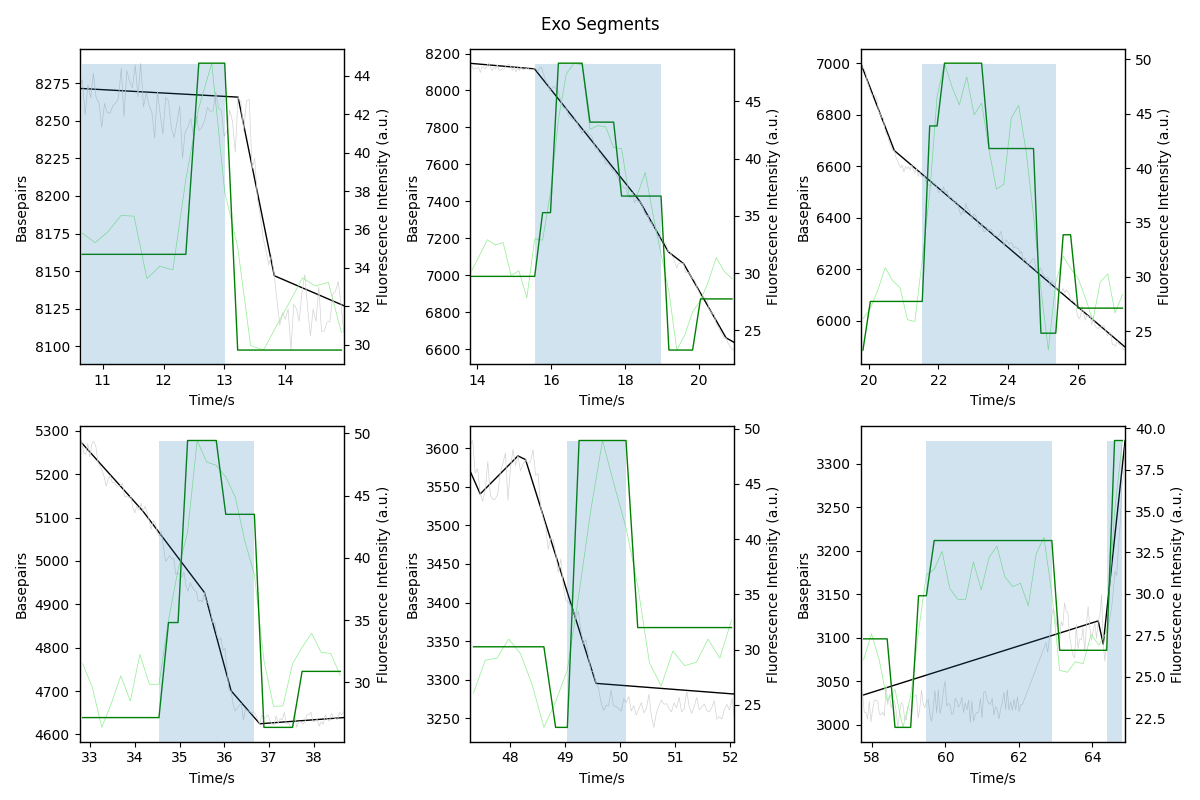

In [18]:
nrows_exo = 2
ncols_exo = 3

fig, axs = plt.subplots(nrows_exo,ncols_exo, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.3)
fig.suptitle('Exo Segments')
data = np.arange(0, len(segment_exo))

for ax, d in zip(axs.ravel(), data):
    segment_plots(segment_exo[d],ax)
    fig.tight_layout()
fig.savefig(cor_file[:-20] + 'exo-segments' +'.png', dpi=300)

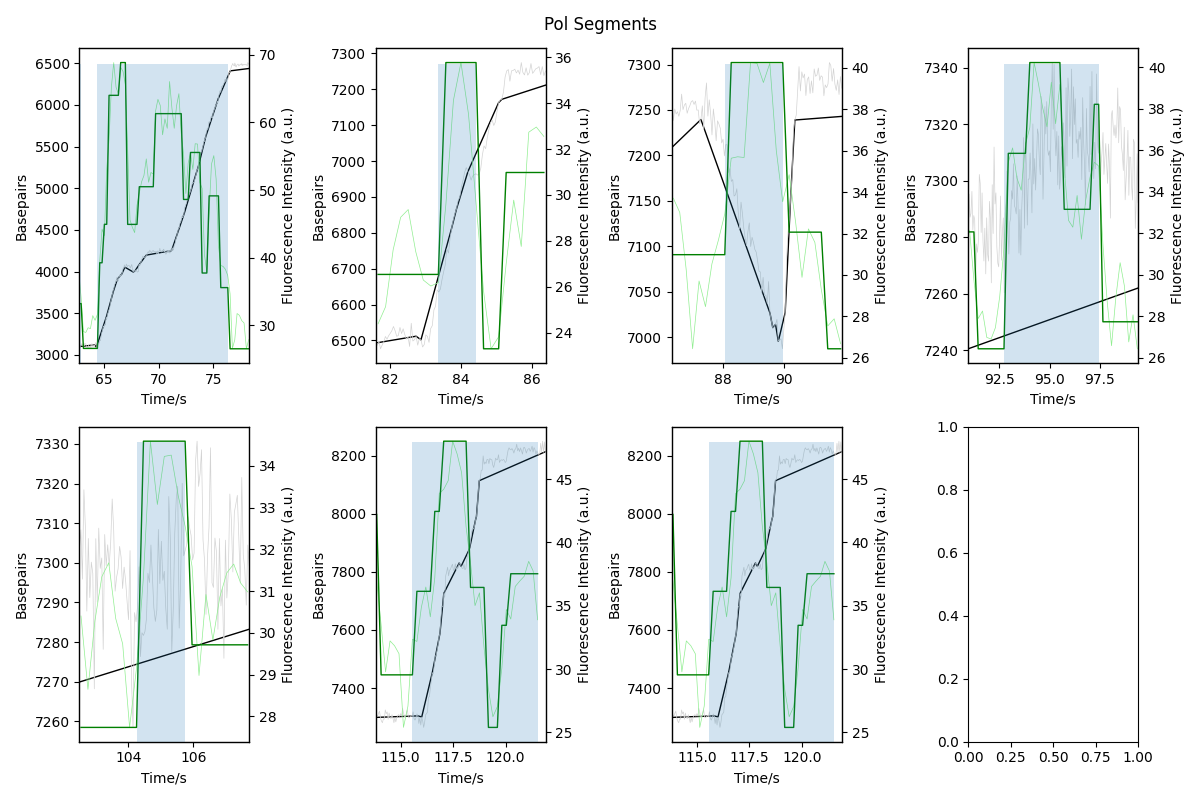

In [19]:
nrows_pol = 2
ncols_pol = 4

fig, axs = plt.subplots(nrows_pol,ncols_pol, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.3)
fig.suptitle('Pol Segments')
data = np.arange(0, len(segment_pol))

for ax, d in zip(axs.ravel(), data):
    segment_plots(segment_pol[d],ax)
    fig.tight_layout()

fig.savefig(cor_file[:-20] + 'pol-segments' +'.png', dpi=300)

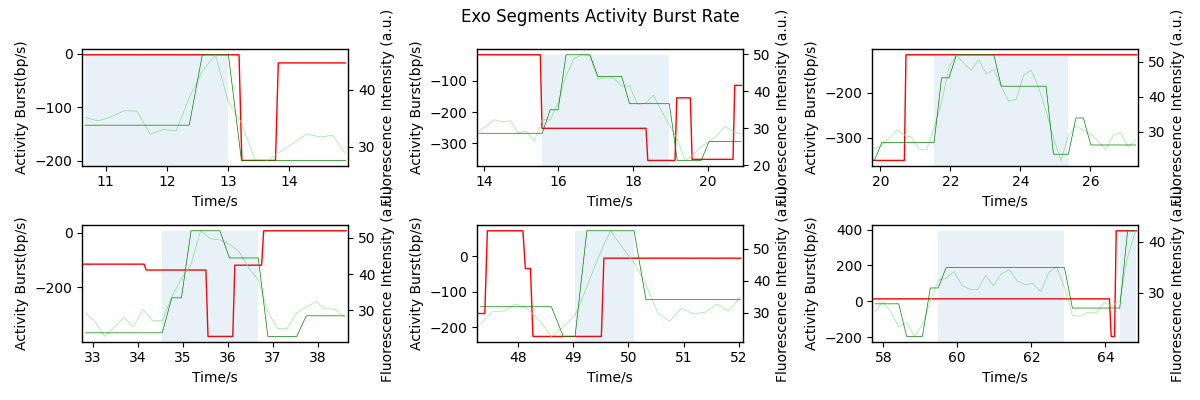

In [20]:
fig, axs = plt.subplots(nrows_exo,ncols_exo, figsize=(12, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.3)
fig.suptitle('Exo Segments Activity Burst Rate')
data = np.arange(0, len(segment_exo))

for ax, d in zip(axs.ravel(), data):
    segment_rate_plots(segment_exo[d],ax)
    fig.tight_layout()
fig.savefig(cor_file[:-20] + 'exo-segments-rate' +'.png', dpi=300)

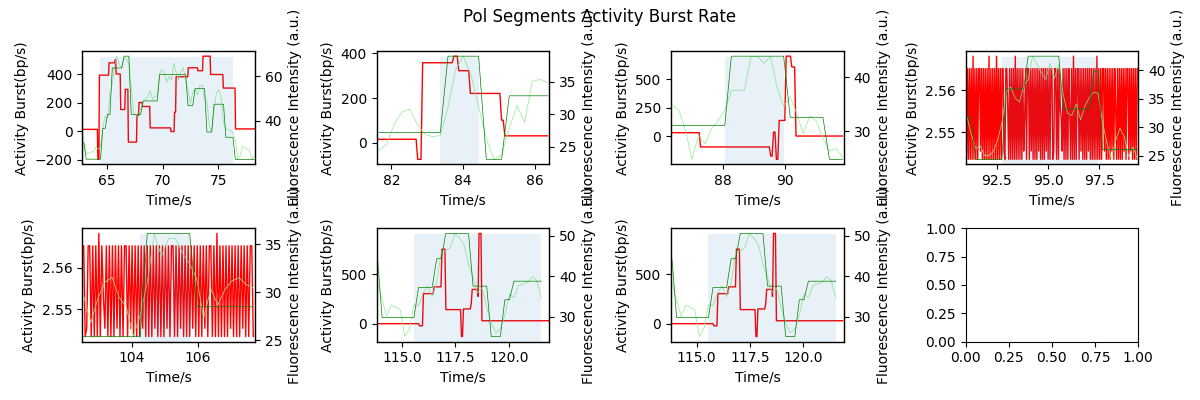

In [21]:
fig, axs = plt.subplots(nrows_pol,ncols_pol, figsize=(12,4), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.3)
fig.suptitle('Pol Segments Activity Burst Rate')
data = np.arange(0, len(segment_pol))

for ax, d in zip(axs.ravel(), data):
    segment_rate_plots(segment_pol[d],ax)
    fig.tight_layout()

fig.savefig(cor_file[:-20] + 'pol-segments-rate' +'.png', dpi=300)